In [1]:
import numpy as np
from sympy import *
import math
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.integrate import odeint
from math import tanh

# Double Scroll

In [70]:
par = np.array([])

x0 = np.array([0.001,2,1])
t = np.arange(0,1600,0.001)

R1 = 1.2
R2 = 3.44
R4 = 0.193
Ir=2.25*10**(-5)
alpha = 11.6

def DoubleScroll(n, t):
    V1,V2,I = n
    dXdt = [V1/R1-(V1-V2)/R2-2*Ir*np.sinh(alpha*(V1-V2)),
           (V1-V2)/R2+2*Ir*np.sinh(alpha*(V1-V2))-I,
           V2-R4*I]
    return dXdt
solDS = odeint(DoubleScroll,x0,t)

<function matplotlib.pyplot.show(close=None, block=None)>

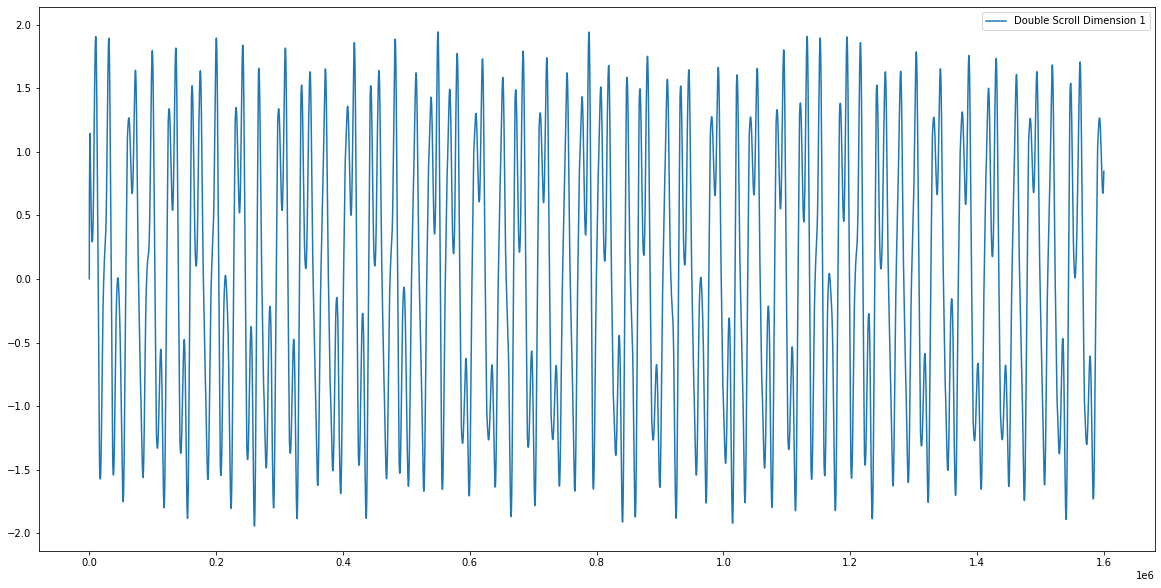

In [71]:
plt.figure(figsize=(20,10))
plt.plot(np.transpose(solDS)[0],label = 'Double Scroll Dimension 1')
plt.legend()
plt.show

In [5]:
Save = np.zeros((3,1200000))
for i in range(3):
    Save[i] = sol2.T[i][50000:1250000]
np.save('DS_001.npy',Save)

# NaKl Driven By L63

In [72]:
par = np.array([10,28,8/3])

x0 = np.array([1,0.2,19])
t = np.arange(0,200,0.002)

#lorenz63 model
def lorenz63(n, t):
    #gNa,ENa,gK,EK,gL,EL,Vm1,dVm,taum0,taum1,Vh0,dVh,tauh0,tauh1,Vn1,dVn,taun0,taun1,F = p
    x,y,z = n
    dXdt = [par[0]*(-x + y),
        x*(par[1] - z) - y,
        -par[2]*z + x*y]
    return dXdt
solL63 = odeint(lorenz63,x0,t)
A = 3*np.transpose(solL63)

<function matplotlib.pyplot.show(close=None, block=None)>

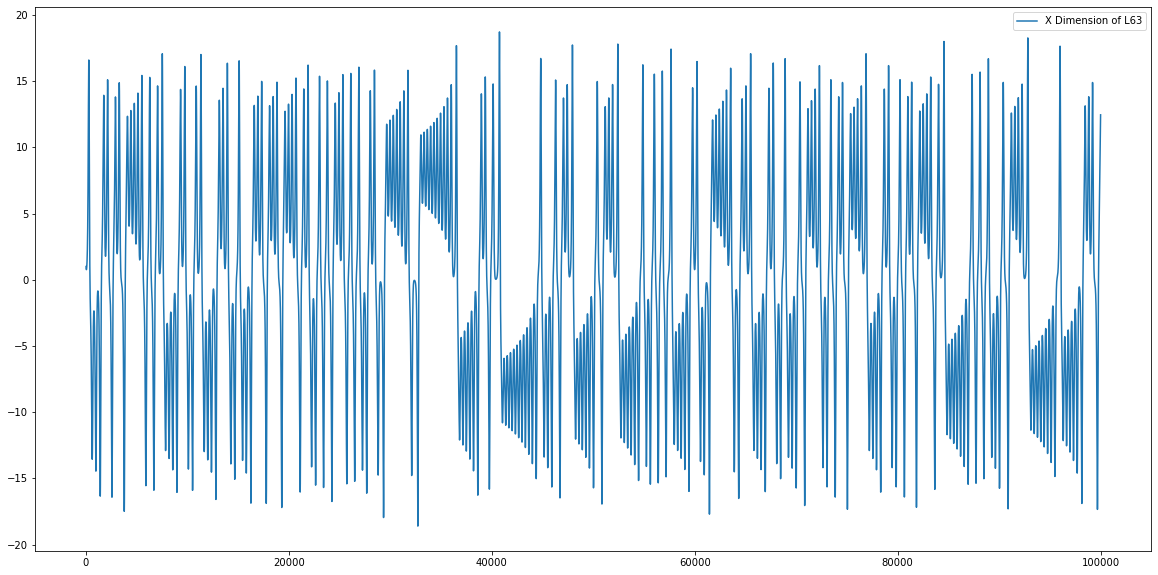

In [74]:
plt.figure(figsize=(20,10))
plt.plot(solL63.T[0],label = 'X Dimension of L63')
plt.legend()
plt.show

In [50]:
#np.save('L63_800k_0002.npy',solL63.T)

In [75]:
par = np.array([120,50,20,-77,.3,-54.4,-40,15,.1,.4,-60,-15,1,7,-55,30,1,5])

x0 = np.array([-65,0.1,0.9,0.1])
t = np.arange(0,1800,0.02)


X = np.arange(0,2000,0.02)
F = interpolate.interp1d(X,A[0])

#NaKL model
def nakl(n, t):
    #gNa,ENa,gK,EK,gL,EL,Vm1,dVm,taum0,taum1,Vh0,dVh,tauh0,tauh1,Vn1,dVn,taun0,taun1,F = p
    v,m,h,n = n
    dXdt = [h*m**3*par[0]*(par[1] - v) + n**4*par[2]*(par[3] - v) + par[4]*(par[5] - v) + F(t),
    (-m + 0.5*tanh((-par[6] + v)/par[7]) + 0.5)/(par[8] + par[9]*(1 - tanh((-par[6] + v)/par[7])**2)),
    (-h + 0.5*tanh((-par[10] + v)/par[11]) + 0.5)/(par[12] + par[13]*(1 - tanh((-par[10] + v)/par[11])**2)),
    (-n + 0.5*tanh((-par[14] + v)/par[15]) + 0.5)/(par[16] + par[17]*(1 - tanh((-par[14] + v)/par[15])**2))]
    return dXdt
solNaKL = odeint(nakl,x0,t)

<function matplotlib.pyplot.show(close=None, block=None)>

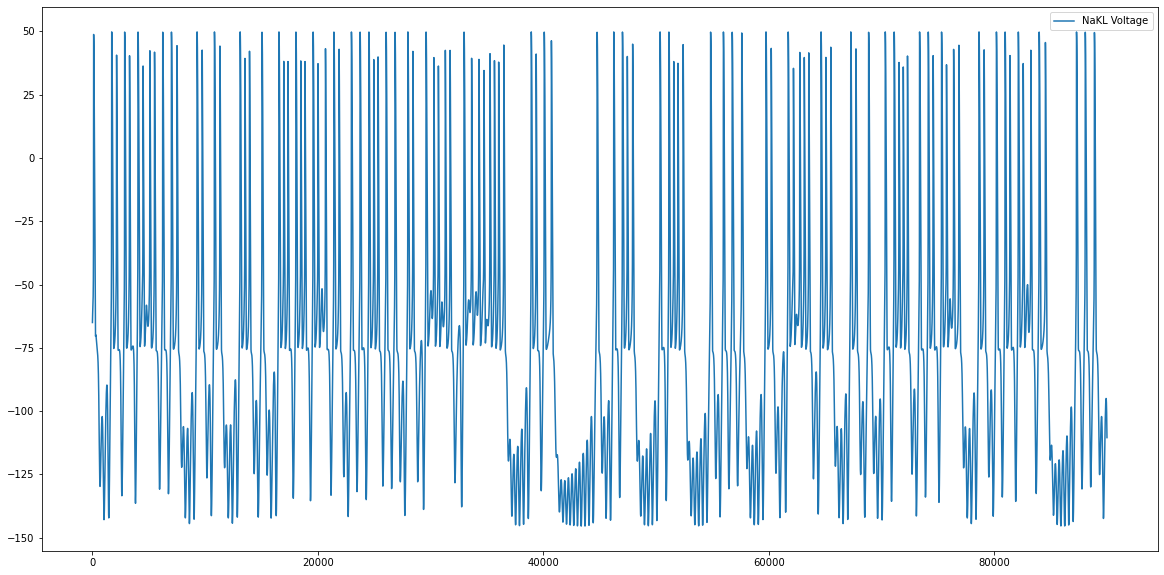

In [78]:
plt.figure(figsize=(20,10))
plt.plot(solNaKL.T[0],label = 'NaKL Voltage')
plt.legend()
plt.show

In [66]:
Save = np.zeros((7,70000))
for i in range(4):
    Save[i] = sol3.T[i][0:70000]
for i in range(3):
    Save[i+4] = A[i][0:70000]
np.save('NaKL_L63_0.02.npy',Save)

# Lorenz96

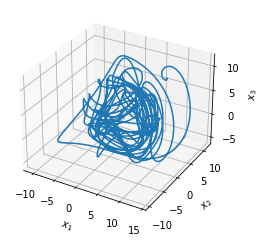

In [80]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# These are our constants
N = 10  # Number of variables
F = 8  # Forcing


def L96(x, t):
    """Lorenz 96 model with constant forcing"""
    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d


x0 = F * np.ones(N)  # Initial state (equilibrium)
x0[0] += 0.01  # Add small perturbation to the first variable
t = np.arange(0.0, 35.0, 0.0001)

x = odeint(L96, x0, t)

# Plot the first three variables
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

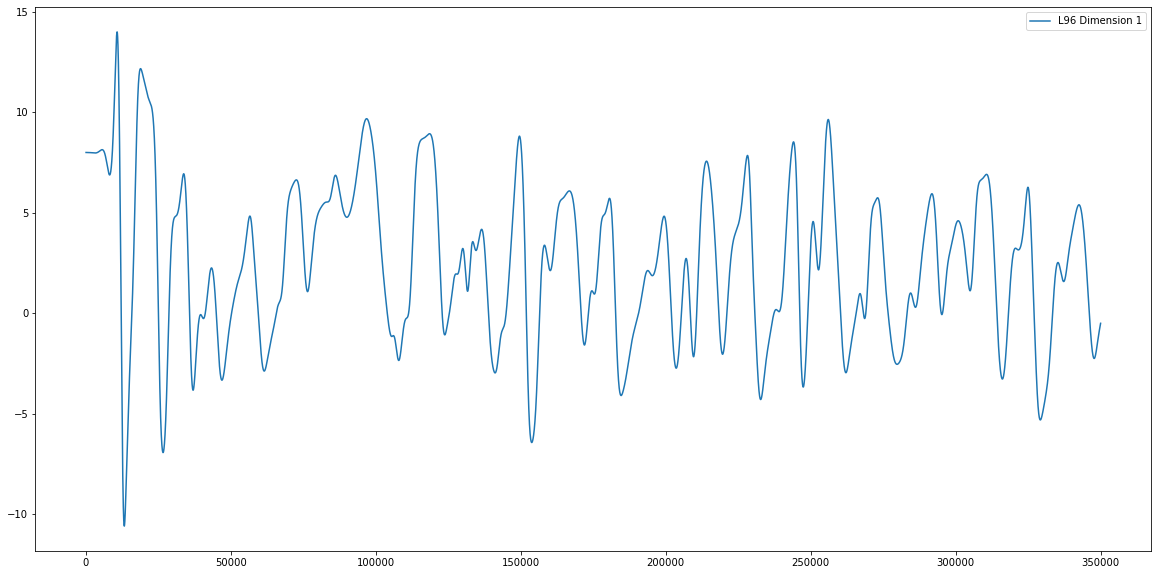

In [81]:
plt.figure(figsize=(20,10))
plt.plot(x.T[0],label = 'L96 Dimension 1')
plt.legend()
plt.show

In [81]:
Save = np.zeros((10,300000))
for i in range(10):
    Save[i] = x.T[i][50000:350000]
np.save('L96D10_0001.npy',Save)

# Colpitts Oscillator

In [82]:
#Let's start with the Colpitts Oscillator
par = np.array([5,0.0797,0.6898,6.2723]) #Alpha, gamma, q, eta

x0 = np.array([1,0.2,19])
t = np.arange(0,5000,0.02)

#lorenz63 model
def colpit(n, t):
    #gNa,ENa,gK,EK,gL,EL,Vm1,dVm,taum0,taum1,Vh0,dVh,tauh0,tauh1,Vn1,dVn,taun0,taun1,F = p
    x,y,z = n
    dXdt = [par[0]*y,
        -par[1]*(x+z)-y*par[2],
        par[3]*(y+1-np.exp(-x))]
    return dXdt
solCol = odeint(colpit,x0,t)

<function matplotlib.pyplot.show(close=None, block=None)>

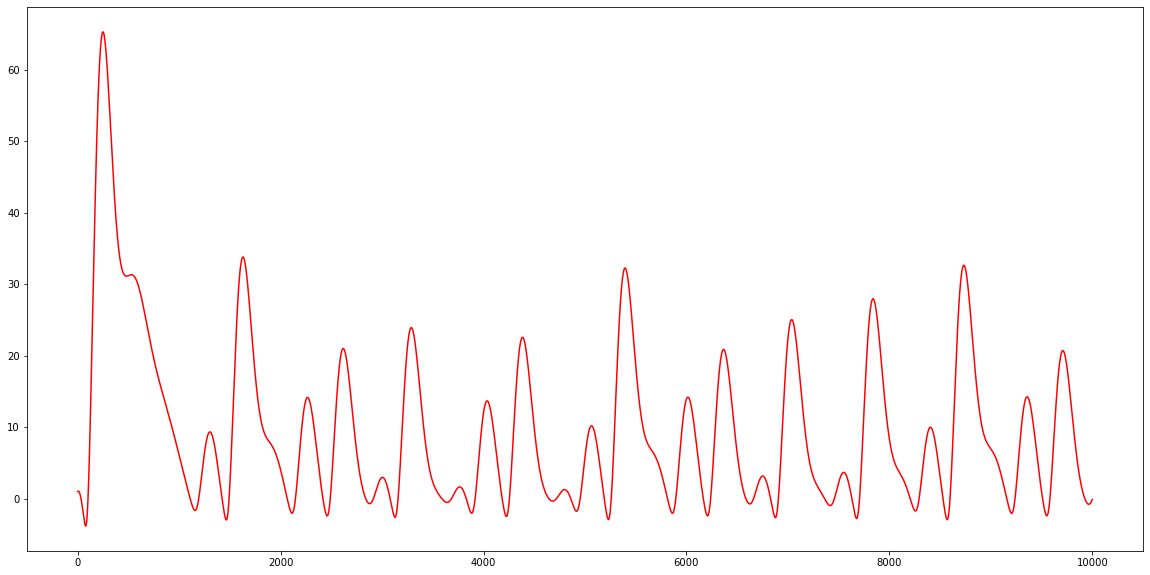

In [83]:
plt.figure(figsize=(20,10))
plt.plot(solCol.T[0][0:10000],label = 'x-dim L63', color = 'r')
#plt.savefig('XDimensionL63')
plt.show

In [11]:
Save = np.zeros((3,3000000))
for i in range(3):
    Save[i] = solCol.T[i][200000:3200000]
np.save('Col_300k_001.npy',Save)